In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv(r'01_Cleaned_File(Pandas).csv')

In [3]:
df1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42,101348.88,0.00,1,Yes,2,Yes,1
1,15647311,Hill,608,Spain,Female,41,112542.58,83807.86,1,Yes,1,Yes,0
2,15619304,Onio,502,France,Female,42,113931.57,159660.80,3,No,8,No,1
3,15701354,Boni,699,France,Female,39,93826.63,0.00,2,No,1,No,0
4,15737888,Mitchell,850,Spain,Female,43,79084.10,125510.82,1,Yes,2,Yes,0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   EstimatedSalary  10000 non-null  float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  object 
 10  Tenure           10000 non-null  int64  
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1015.8+ KB


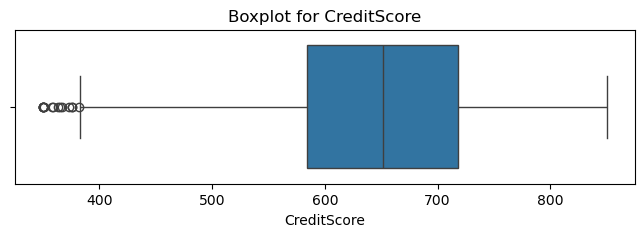

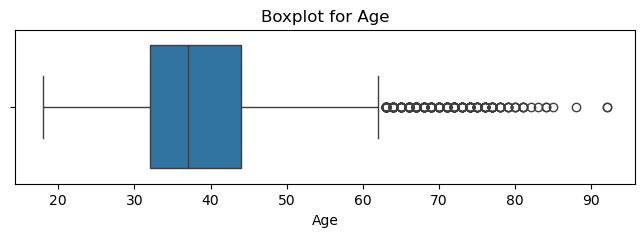

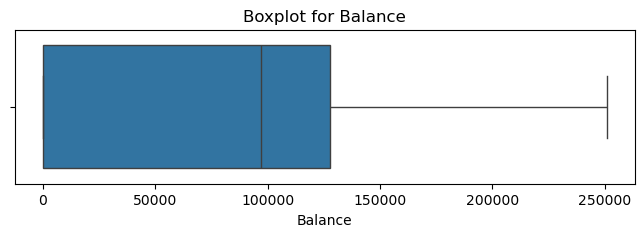

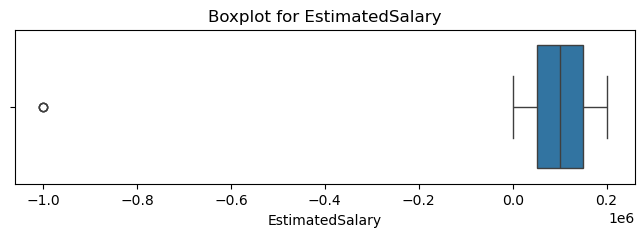

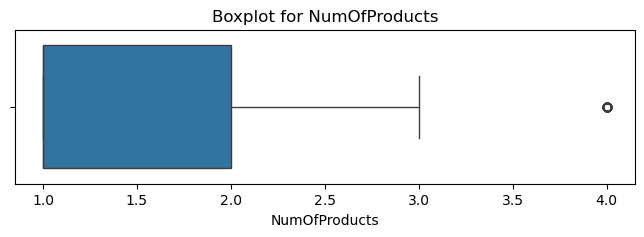

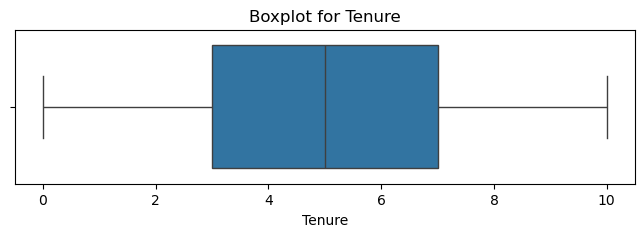

In [5]:
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Tenure']

for col in num_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df1[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [6]:
df1['EstimatedSalary'].min()

-999999.0

In [7]:
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Tenure']
for col in num_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_val = [x for x in df1[col] if x > upper_bound or x < lower_bound]
    print(f'Outlier values for {col}: {outlier_val}')

Outlier values for CreditScore: [376, 376, 363, 359, 350, 350, 358, 351, 365, 367, 350, 350, 382, 373, 350]
Outlier values for Age: [66, 75, 65, 73, 65, 72, 67, 67, 79, 80, 68, 75, 66, 66, 70, 63, 72, 64, 64, 70, 67, 82, 63, 69, 65, 69, 64, 65, 74, 67, 66, 67, 63, 70, 71, 72, 67, 74, 76, 66, 63, 66, 68, 67, 63, 71, 66, 69, 73, 65, 66, 64, 69, 64, 77, 74, 65, 70, 67, 69, 67, 74, 69, 74, 74, 64, 63, 63, 70, 74, 65, 72, 77, 66, 65, 74, 88, 63, 71, 63, 64, 67, 70, 68, 72, 71, 66, 75, 67, 73, 69, 76, 63, 85, 67, 74, 76, 66, 69, 66, 72, 63, 71, 63, 74, 67, 72, 72, 66, 84, 71, 66, 63, 74, 69, 84, 67, 64, 68, 66, 77, 70, 67, 79, 67, 76, 73, 66, 67, 64, 73, 76, 72, 64, 71, 63, 70, 65, 66, 65, 80, 66, 63, 63, 63, 63, 66, 74, 69, 63, 64, 76, 75, 68, 69, 77, 64, 66, 74, 71, 67, 68, 64, 68, 70, 64, 75, 66, 64, 78, 65, 74, 64, 64, 71, 77, 79, 70, 81, 64, 68, 68, 63, 79, 66, 64, 70, 69, 71, 72, 66, 68, 63, 71, 72, 72, 64, 78, 75, 65, 65, 67, 63, 68, 71, 73, 64, 66, 71, 69, 71, 66, 76, 69, 73, 64, 64,

### Logic For Removing the Outliers
* As we can see, the outlier values in the EstimatedSalary column are negative. However, in real world, an estimated salary cannot be negative which makes reasonable to remove those outliers.<br>
* Its not always like we have to remove every outliers.<br>

In [8]:
df1 = df1[df1['EstimatedSalary'] >= 0].reset_index(drop = True)
df1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42,101348.88,0.00,1,Yes,2,Yes,1
1,15647311,Hill,608,Spain,Female,41,112542.58,83807.86,1,Yes,1,Yes,0
2,15619304,Onio,502,France,Female,42,113931.57,159660.80,3,No,8,No,1
3,15701354,Boni,699,France,Female,39,93826.63,0.00,2,No,1,No,0
4,15737888,Mitchell,850,Spain,Female,43,79084.10,125510.82,1,Yes,2,Yes,0


In [9]:
df1.shape

(9997, 13)

In [10]:
df1.sort_values(by ='EstimatedSalary', ascending = True)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
2360,15791053,Lucciano,709,Germany,Male,45,11.58,122917.71,1,Yes,4,Yes,1
9644,15679693,Walker,625,France,Male,31,90.07,0.00,2,Yes,5,Yes,0
9008,15786463,Hsing,645,Germany,Female,59,91.75,121669.93,2,No,8,No,1
5546,15639662,Phillips,710,France,Male,38,96.27,0.00,2,No,2,No,0
4987,15602851,Ozioma,629,France,Male,40,106.67,0.00,1,No,9,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8924,15709136,Adams,620,France,Male,28,199909.32,0.00,2,Yes,8,Yes,0
9094,15762331,Moss,569,France,Male,37,199929.17,178755.84,1,No,9,No,0
4415,15697270,Gannon,608,Spain,Male,27,199953.33,153325.10,1,Yes,4,Yes,0
3578,15634359,Dyer,639,Germany,Female,41,199970.74,98635.77,1,No,5,No,0


### Observation for (Estimated Salary is LOW, but Balance is HIGH)
* Income from other sources besides salary (business, investments).<br>
* Recent large deposits or fund transfers.<br>
* Multiple or joint accounts impacting the balance.<br>
* Salary data might be outdated or partial.<br>

### What to do now??
* My idea is, we come to this part, after we have done the feature scaling and the encoding

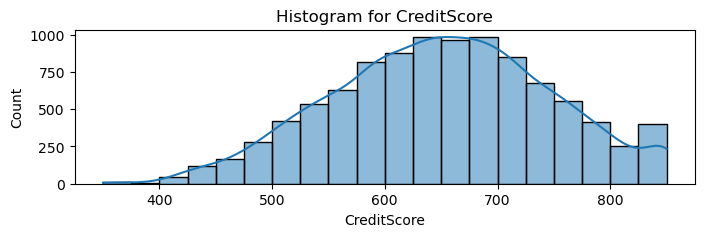

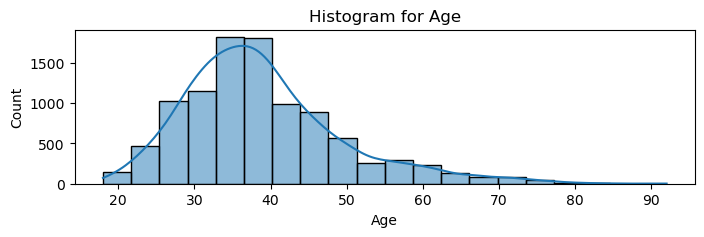

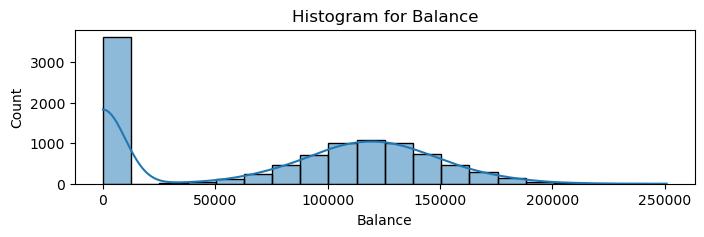

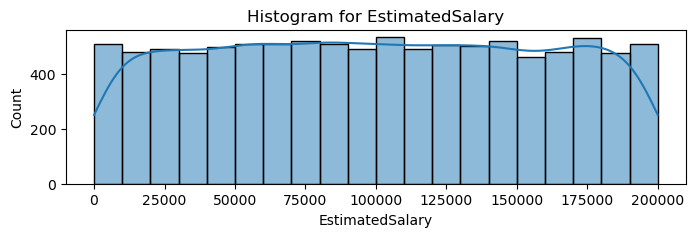

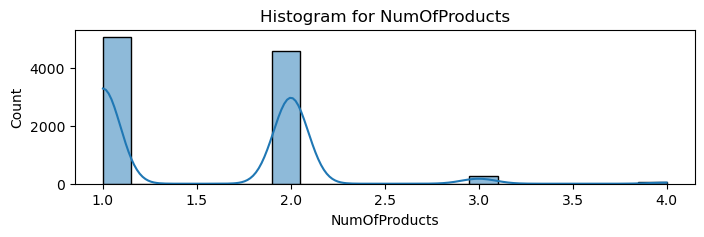

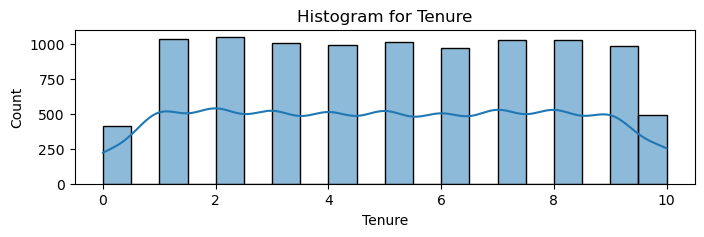

In [11]:
for col in num_cols:
    plt.figure(figsize=(8, 2))
    sns.histplot(x=df1[col], bins = 20, kde = True)
    plt.title(f'Histogram for {col}')
    plt.show()


In [12]:
df1.to_csv('02_Cleaned_File(Outliers).csv', index = False)